In [1]:
# ce travail constiste a créer un modele pour lq prediction de meilleur culture.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\Patrick Ilunga/agrico.csv")

In [3]:
df.head(112)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
107,89,60,19,25.191924,66.690290,5.913665,78.066396,maize
108,76,44,17,20.416831,62.554248,5.855442,65.277985,maize
109,67,60,25,24.921622,66.786274,5.750255,109.216228,maize
110,70,44,19,23.316891,73.454154,5.852607,94.297128,maize


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,86.283333,41.586667,29.866667,23.873004,68.744972,6.486990,159.671465
std,16.036008,11.932467,8.755441,2.483604,10.957417,0.601029,67.254051
min,60.000000,15.000000,15.000000,18.041855,50.045570,5.005307,60.651715
25%,74.000000,34.750000,22.000000,22.274884,59.500832,6.043447,100.471646
50%,86.000000,41.000000,30.000000,24.234176,67.079193,6.500140,157.770963
75%,98.000000,52.000000,38.000000,25.759402,80.908597,6.940865,203.401698
max,120.000000,60.000000,45.000000,27.923744,84.969072,7.868475,298.560117


In [5]:


# Datatypes of Attributes
df.info

<bound method DataFrame.info of        N   P   K  temperature   humidity        ph    rainfall   label
0     90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1     85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340    rice
..   ...  ..  ..          ...        ...       ...         ...     ...
295  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
296   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
297  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
298  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
299  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[300 rows x 8 columns]>

In [6]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

N               59
P               46
K               31
temperature    300
humidity       300
ph             300
rainfall       300
label            3
dtype: int64

In [7]:


df.isnull().sum()



N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:


df['label'].unique()



array(['rice', 'maize', 'coffee'], dtype=object)

In [9]:


df['label'].value_counts()



rice      100
maize     100
coffee    100
Name: label, dtype: int64

<AxesSubplot:xlabel='N', ylabel='Density'>

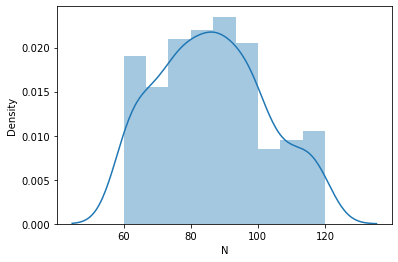

In [10]:
sns.distplot(df['N'])

<AxesSubplot:>

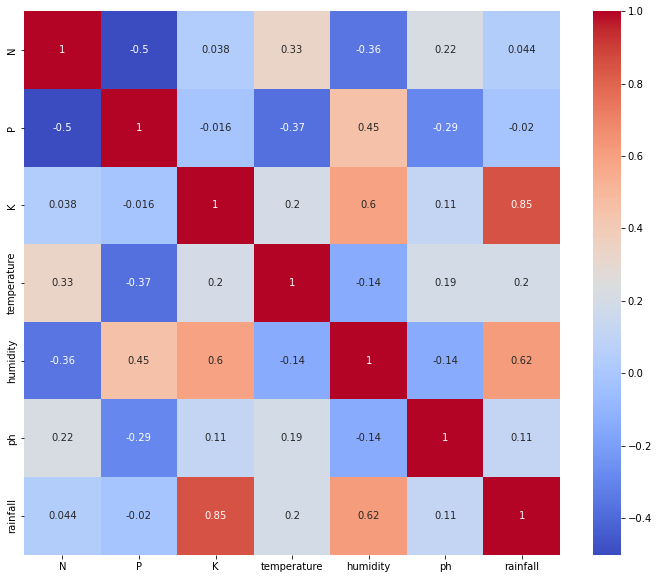

In [11]:

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [13]:
X

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [14]:
y

array(['rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'rice',
       'rice', 'rice', 'rice', 'rice', 'maize', 'maize', 'maize', 'maize',
       'maize', 'maize', 'maize', 'maize', 'maize', 'maize', 'maize',
   

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


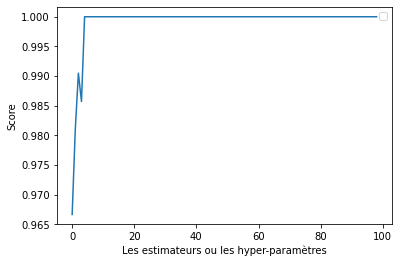

Random Forest Classification's Accuracy : 1.0
Support Vector Machine's Accuracy : 1.0
Kernel SVM's Accuracy : 1.0
K-Nearest Neighbours's Accuracy : 1.0


In [17]:
# application des algorithnes

#arbre de decision
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
acc = accuracy_score(y_test, y_pred)

#print("Decision Tree Classification's Accuracy :", acc)


#random forest
from sklearn.ensemble import RandomForestClassifier
val_score = []
for i in range(1, 100):
    score = cross_val_score(RandomForestClassifier(i), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)
plt.xlabel('Les estimateurs ou les hyper-paramètres')
plt.ylabel('Score')
plt.legend()
plt.show()
    
    #classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
    #classifier.fit(X_train, y_train)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Random Forest Classification's Accuracy :", acc)

#vector machine 

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Support Vector Machine's Accuracy :", acc)

#Kernel SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Kernel SVM's Accuracy :", acc)

#K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbours's Accuracy :", acc)




In [18]:
from sklearn.model_selection import GridSearchCV
#définition du dictionnaire des paramètres:
grid_params ={
    'n_estimators': np.arange(1, 100),
    'criterion' : ['entropy']
}
grid = GridSearchCV(RandomForestClassifier(), grid_params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [19]:
grid.best_score_

1.0

In [20]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 5}

In [21]:
modele_patrick = grid.best_estimator_

In [22]:
modele_patrick.score(X_test, y_test)

1.0

In [23]:
y_train.shape

(210,)

In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:


# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

      coffee       1.00      1.00      1.00        34
       maize       1.00      1.00      1.00        29
        rice       1.00      1.00      1.00        27

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



In [26]:
modele_patrick.predict(sc.transform([[107,90,34,26.774637,66.690290,6.780064, 177.774507]]))

array(['coffee'], dtype=object)

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict=DT.predict(X_test)

In [28]:
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


from sklearn.metrics import accuracy_score
accuracy_train,accuracy_test=[],[]
for i in ccp_alphas:
    DT_clf=DecisionTreeClassifier(ccp_alpha=i)
    DT_clf.fit(X_train,y_train)
    y_pred_train=DT_clf.predict(X_train)
    y_pred_test=DT_clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))

<function matplotlib.pyplot.show(close=None, block=None)>

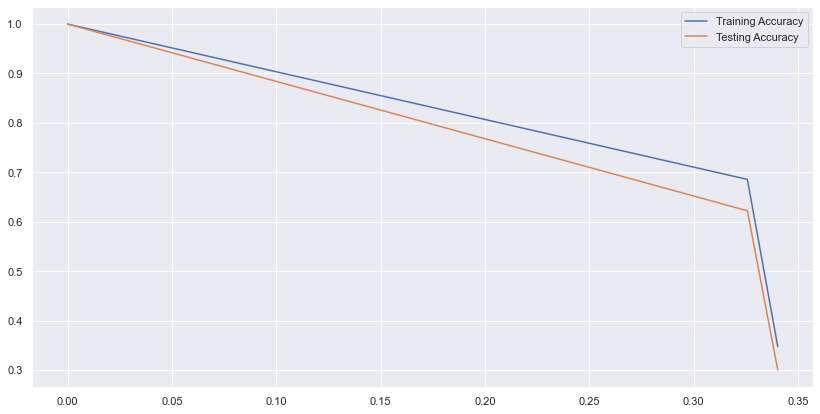

In [29]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=ccp_alphas,label="Training Accuracy")
sns.lineplot(y=accuracy_test,x=ccp_alphas,label="Testing Accuracy ")
plt.show

In [36]:
DT_clf=DecisionTreeClassifier(ccp_alpha=0.06,random_state=)
DT_clf.fit(X_train,y_train)
y_pred_train=DT_clf.predict(X_train)
y_pred_test=DT_clf.predict(X_test)
print("Training Accuracy=",accuracy_score(y_train,y_pred_train),"\n Testing Accuracy=",accuracy_score(y_test,y_pred_test))

Training Accuracy= 1.0 
 Testing Accuracy= 1.0


[[2307    2]
 [  22 1095]]


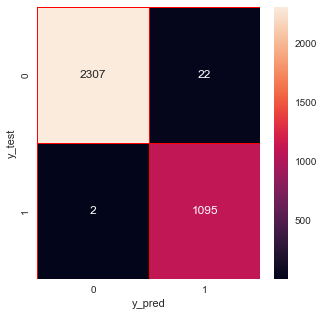

In [60]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

from sklearn.metrics import accuracy_score, confusion_matrix 
mat = confusion_matrix(y_pred, y_test)
print(mat)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt =".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()


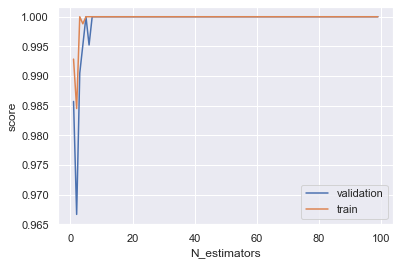

In [37]:
#utilisation de la courbe de validation
from sklearn.model_selection import validation_curve
from numpy import arange
# = RandomForestClassifier()
i = arange(1, 100)
train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train, param_name='n_estimators', param_range=i, cv=5)
#affichage des courbes de validation et train
plt.plot(i, val_score.mean(axis=1), label ='validation')
plt.plot(i, train_score.mean(axis=1), label='train')
plt.xlabel('N_estimators')
plt.ylabel('score')
plt.legend()


In [38]:
print(classifier.predict(sc.transform([[107,90,34,26.774637,66.690290,6.780064, 177.774507]])))


['rice']


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

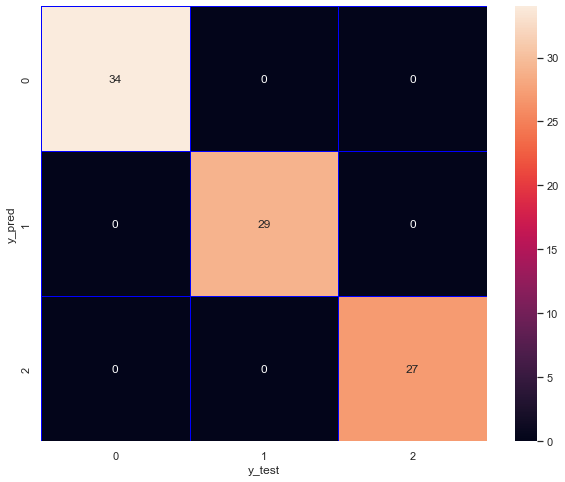

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "blue", fmt =".0f", ax=ax)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

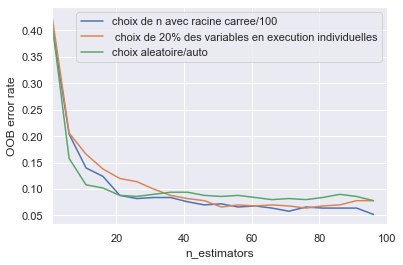

In [41]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "choix de n avec racine carree/100",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        " choix de 20% des variables en execution individuelles",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "choix aleatoire/auto",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()




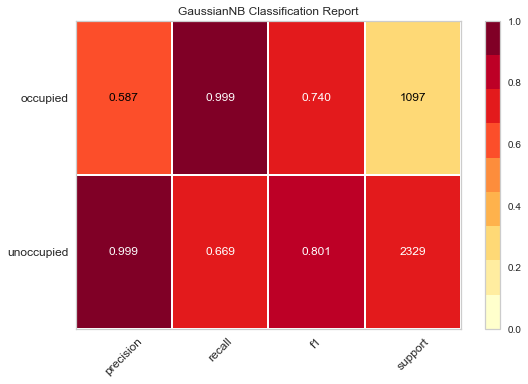

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [42]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification dataset
X, y = load_occupancy()

# Specify the target classes
classes = ["unoccupied", "occupied"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

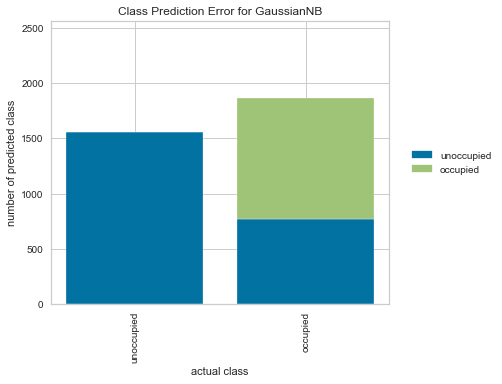

<AxesSubplot:title={'center':'Class Prediction Error for GaussianNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [43]:
from yellowbrick.classifier import ClassPredictionError 
visualizer = ClassPredictionError(
    model, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [44]:
from sklearn.neighbors import KNeighborsClassifier
score=[]
for i in range (1,20):
    knn=KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(X_train,y_train)
    score.append(knn.score(X_test,y_test))

In [45]:
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn.fit(X_train,y_train)

print('Training Accuracy:- ', knn.score(X_train,y_train))
print('Testing Accuracy:- ',knn.score(X_test,y_test))

Training Accuracy:-  0.9914205672931015
Testing Accuracy:-  0.9833625218914186


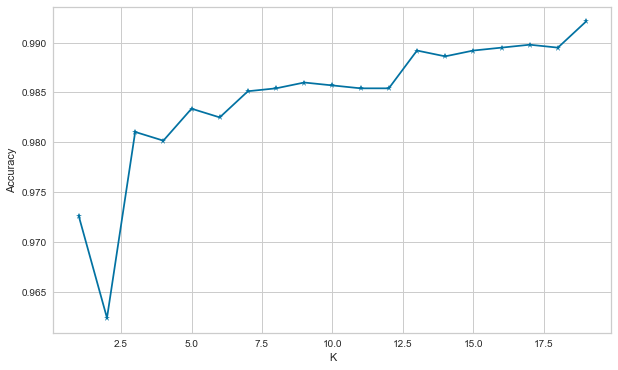

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),score,marker='*')
plt.xlabel('K')
plt.ylabel('Accuracy');

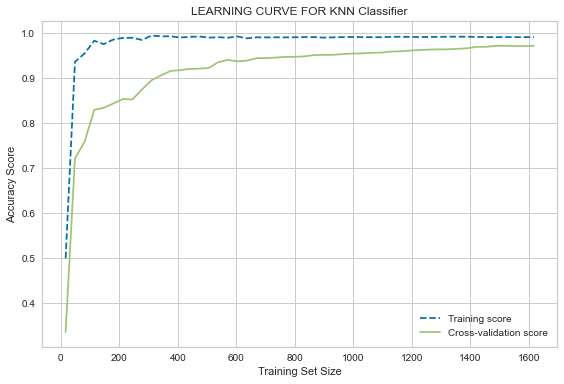

In [47]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
  
# Load data set
dataset = load_digits()
  
# X contains data and y contains labels
X, y = dataset.data, dataset.target
  
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

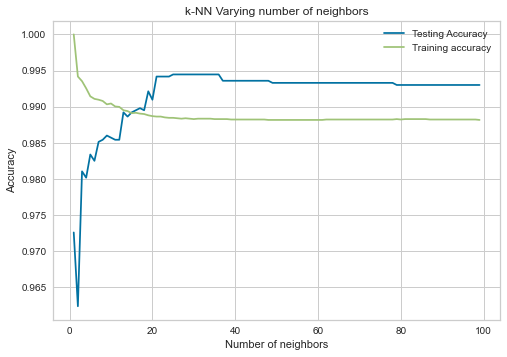

In [48]:

from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [49]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)


array([[2307,   22],
       [   2, 1095]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2329
           1       0.98      1.00      0.99      1097

    accuracy                           0.99      3426
   macro avg       0.99      0.99      0.99      3426
weighted avg       0.99      0.99      0.99      3426



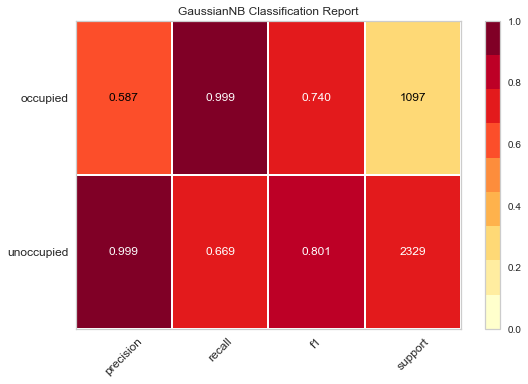

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [51]:
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [52]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
knn_cv.best_score_


0.9671711544413494

In [54]:

knn_cv.best_params_

{'n_neighbors': 2}

KNN: 0.972137 (0.023874)
CART: 0.873653 (0.051709)
RF: 0.975499 (0.019637)


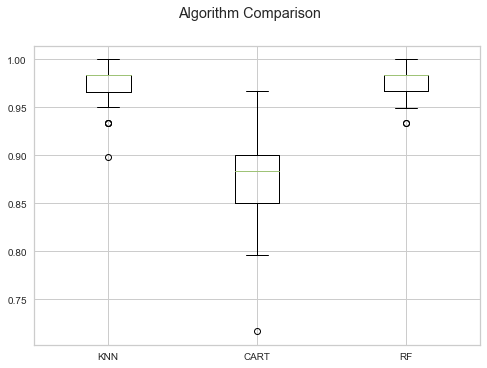

In [55]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=17, metric='minkowski', p=2)))
models.append(('CART', DecisionTreeClassifier(criterion = 'entropy', random_state = 1)))
models.append(('RF', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0,)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=25,)
	cv_results = model_selection.cross_val_score(model, X, y, cv=30, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()